# Evolutionary computation  
# 4 in a line 

# AI VS Random

In [1]:
import copy
import random
import numpy
from deap import algorithms, base, creator, tools, gp
import operator
import matplotlib.pyplot as plt
import time

players=[1,2]

# ___________PRINT_DESC_____________________

def printMatrix ( matrix,n,score,step,player ): 
    print('Win:',score)
    print('__________Player:{}__Step:{}__________'.format(player,step))
    for i in range ( len(matrix) ): 
        for j in range ( len(matrix[i]) ): 
            print ( "{:4d}".format(matrix[i][j]), end = "" ) 
        print ()
    
# ______________CHECK_WINNER______________________

def checkWins(desc):
    for player in players:
        for row in range(len(desc)):
            for column in range(len(desc[row])-3): 
                if desc[row][column] == player and desc[row][column+1] == player and desc[row][column+2] == player and desc[row][column+3] == player:
                    return player
                
    for player in players:
        for row in range(len(desc)-3):
            for column in range(len(desc[row])): 
                if desc[row][column] == player and desc[row+1][column] == player and desc[row+2][column] == player and desc[row+3][column] == player:
                    return player
                
    for player in players:
        for row in range(len(desc)-3):
            for column in range(len(desc[row])-3): 
                if desc[row][column] == player and desc[row+1][column+1] == player and desc[row+2][column+2] == player and desc[row+3][column+3] == player:
                    return player
                
    for player in players:
        for row in range(3,len(desc)):
            for column in range(len(desc[row])-3): 
                if desc[row][column] == player and desc[row-1][column+1] == player and desc[row-2][column+2] == player and desc[row-3][column+3] == player:
                    return player 
    else:
        return 0
 
# ______________STEP_______________________

def pull(column,player,field):
    if column<1 or column>7:
        return False
    for i in list(range(0,len(field)))[::-1]:
        if field[i][column-1]==0:
            field[i][column-1]=player
            break
        else:
            continue
    return field  

# _____________NUMBERS_OF_1___________________________

def count1 (desk):
    count=0
    for i in desk:
        for j in i:
            if j==1:
                count+=1    
    return count
# _________________NUMBERS_OF_2_______________________

def count2 (desk):
    count=0
    for i in desk:
        for j in i:
            if j==2:
                count+=1    
    return count

# _________________NUMBERS_OF_1_ARROUN_THE_EDGES________

def edges1 (desk):
    count=0
    for i in range(1,len(desk)-1):
        for j in [0,len(desk)]:
            if desk[i][j]==1:
                count+=1 
    for i in [0,len(desk)-1]:
        for j in desk[i]:
            if j==1:
                count+=1   
    return count 

# _________________NUMBERS_OF_2_ARROUN_THE_EDGES________

def edges2 (desk):
    count=0
    for i in range(1,len(desk)-1):
        for j in [0,len(desk)]:
            if desk[i][j]==2:
                count+=1 
    for i in [0,len(desk)-1]:
        for j in desk[i]:
            if j==2:
                count+=1   
    return count 

# _________________NUMBERS_OF_1_NEAR_CORNERS___________________

def near_corner1 (desk):
    count=0
    left_up_corner=[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
    left_down_corner=[(len(desk)-1,0),(len(desk)-1,1),(len(desk)-1,2),(len(desk)-2,0),(len(desk)-2,1),(len(desk)-2,2),(len(desk)-3,0),(len(desk)-3,1),(len(desk)-3,2)]
    right_up_corner=[(0,len(desk[0])-1),(0,len(desk[0])-2),(0,len(desk[0])-3),(1,len(desk[0])-1),(1,len(desk[0])-2),(1,len(desk[0])-3),(2,len(desk[0])-1),(2,len(desk[0])-2),(2,len(desk[0])-3)]
    right_down_corner=[(len(desk)-1,len(desk[0])-1),(len(desk)-1,len(desk[0])-2),(len(desk)-1,len(desk[0])-3),(len(desk)-2,len(desk[0])-1),(len(desk)-2,len(desk[0])-2),(len(desk)-2,len(desk[0])-3),(len(desk)-3,len(desk[0])-1),(len(desk)-3,len(desk[0])-2),(len(desk)-3,len(desk[0])-3)]
    for corner in [left_up_corner,left_down_corner,right_up_corner,right_down_corner]:
        for x,y in corner:
            if desk[x][y]==1:
                count+=1
     
    return count 

# _________________NUMBERS_OF_2_NEAR_CORNERS___________________

def near_corner2 (desk):
    count=0
    left_up_corner=[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
    left_down_corner=[(len(desk)-1,0),(len(desk)-1,1),(len(desk)-1,2),(len(desk)-2,0),(len(desk)-2,1),(len(desk)-2,2),(len(desk)-3,0),(len(desk)-3,1),(len(desk)-3,2)]
    right_up_corner=[(0,len(desk[0])-1),(0,len(desk[0])-2),(0,len(desk[0])-3),(1,len(desk[0])-1),(1,len(desk[0])-2),(1,len(desk[0])-3),(2,len(desk[0])-1),(2,len(desk[0])-2),(2,len(desk[0])-3)]
    right_down_corner=[(len(desk)-1,len(desk[0])-1),(len(desk)-1,len(desk[0])-2),(len(desk)-1,len(desk[0])-3),(len(desk)-2,len(desk[0])-1),(len(desk)-2,len(desk[0])-2),(len(desk)-2,len(desk[0])-3),(len(desk)-3,len(desk[0])-1),(len(desk)-3,len(desk[0])-2),(len(desk)-3,len(desk[0])-3)]
    for corner in [left_up_corner,left_down_corner,right_up_corner,right_down_corner]:
        for x,y in corner:
            if desk[x][y]==2:
                count+=1
     
    return count 

# _________________NUMBERS_OF_1_IN_CORNER_______________________

def corner1 (desk):
    count=0
    if desk[0][0]==1:
        count+=1
    if desk[len(desk)-1][0]==1:
        count+=1  
    if desk[len(desk)-1][len(desk[0])-1]==1:
        count+=1 
    if desk[0][len(desk[0])-1]==1:
        count+=1      
    return count

# _________________NUMBERS_OF_2_IN_CORNER_______________________

def corner2 (desk):
    count=0
    if desk[0][0]==2:
        count+=1
    if desk[len(desk)-1][0]==2:
        count+=1  
    if desk[len(desk)-1][len(desk[0])-1]==2:
        count+=1 
    if desk[0][len(desk[0])-1]==2:
        count+=1      
    return count

# _________________CENTER_1_______________________

def center1 (desk):
    if desk[len(desk)-1][3]==1:
        return 1
    else: 
        return 0
    
# _________________CENTER_2_______________________

def center2 (desk):
    if desk[len(desk)-1][3]==2:
        return 1
    else: 
        return 0   
    
# ______________FIGHT_TREE_VS_RANDOM_________________

def oneVsRandom(tree):
    n=0
    player=1
    desc=[[0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0]]

    while n<100:
        if player==1:
            count_1=count1(desc)
            count_2=count2(desc)
            edges_1=edges1(desc)
            edges_2=edges2(desc)
            nearcorner1=near_corner1(desc)
            nearcorner2=near_corner2(desc)
            corner_1=corner1(desc)
            corner_2=corner2(desc)
            center_1=center1(desc)
            center_2=center2(desc)

            step=tree(count1=count_1,count2=count_2,edges1=edges_1,edges2=edges_2,nearCorner1=nearcorner1,nearCorner2=nearcorner2,corner1=corner_1,corner2=corner_2,center1=center_1,center2=center_2)
#             print(step,'Count 1',count_1,'Count 2',count_2,'Edges 1',edges_1,'Edges 2',edges_2,'Near corner 1',nearcorner1,'Near corner 2',nearcorner2,'Corner 1',corner_1,'Corner 2',corner_2,'Center 1',center_1,'Center 2',center_2)
            desc=pull(step,player,desc)
            if desc==False:
#                 print('Step {} Win Player2'.format(step))
                return 2
        
            score=checkWins(desc)
#             printMatrix(desc,n,score,step,player)
            if score==1:
                return 1
                break
            if score==2:
                return 2
                break   
            player=2
        elif player==2:
            step=random.randint(1,7)
            desc=pull(step,player,desc)
            score=checkWins(desc)
#             printMatrix(desc,n,score,step,player)
            if score==1:
                return 1
                break
            if score==2:
                return 2
                break   
            player=1        
        n+=1
            
# ______________EVALUATE________________________

def evaluate (tree):
    n=0
    fitness=0
    function=gp.compile(tree,pset)
    while n<500:
#         print('Round {}'.format(n+1))
        fight=oneVsRandom(function)
        if fight==1:
            fitness+=1
        n+=1        
     
    return fitness,

# _________________________________________________

def protectedDiv(left, right):
    try:
        return int(left / right)
    except ZeroDivisionError:
        return 1
    
# _________________________________________________    

def if_then_more_else(x1, x2,x3,x4):
    if x1>x2:
        return x3
    else:
        return x4
    
# _________________________________________________  

# def if_then_equal_else(x1, x2,x3,x4):
#     if x1==x2:
#         return x3
#     else:
#         return x4    


In [3]:
pset = gp.PrimitiveSet("main", 10)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(if_then_more_else, 4)
# pset.addPrimitive(if_then_equal_else, 4)
pset.renameArguments(ARG0="count1")
pset.renameArguments(ARG1="count2")
pset.renameArguments(ARG2="edges1")
pset.renameArguments(ARG3="edges2")
pset.renameArguments(ARG4="nearCorner1")
pset.renameArguments(ARG5="nearCorner2")
pset.renameArguments(ARG6="corner1")
pset.renameArguments(ARG7="corner2")
pset.renameArguments(ARG8="center1")
pset.renameArguments(ARG9="center2")
pset.addTerminal(3)
pset.addTerminal(1)
pset.addTerminal(5)
pset.addTerminal(7)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax,pset=pset)
toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual,toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("select", tools.selRoulette)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=1, max_=3)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
pop = toolbox.population(n=100)
hof = tools.HallOfFame(100)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Average", numpy.mean)
stats.register("Median", numpy.median)
stats.register("Min", numpy.min)
stats.register("Max", numpy.max)
before = time.time()
a,v=algorithms.eaSimple(pop, toolbox, 0.7, 0.001, 100, stats, halloffame=hof)
after=time.time()
print('Algorithms time',after-before)

C:\Users\User\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\User\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	Average	Median	Min	Max
0  	100   	47.79  	0     	0  	431
1  	74    	95.79  	0     	0  	406
2  	74    	165.71 	97    	0  	408
3  	80    	239.52 	340.5 	0  	417
4  	68    	284.66 	354   	0  	421
5  	74    	253.76 	356.5 	0  	437
6  	66    	296.08 	361   	0  	437
7  	78    	299.87 	360   	0  	436
8  	76    	309.35 	357.5 	0  	435
9  	62    	314.2  	364   	0  	435
10 	64    	340.96 	365.5 	0  	435
11 	74    	310.57 	367   	0  	445
12 	54    	361.48 	395   	0  	445
13 	66    	372.04 	407   	0  	453
14 	78    	363.01 	401   	0  	448
15 	66    	375.06 	409   	0  	448
16 	86    	380.97 	380   	0  	448
17 	66    	392.25 	418.5 	0  	450
18 	60    	396.58 	422   	0  	450
19 	64    	379.58 	421   	0  	450
20 	66    	378.07 	417   	0  	450
21 	68    	386.11 	433   	0  	457
22 	84    	389.54 	425.5 	0  	457
23 	86    	369.09 	421   	0  	457
24 	62    	390.73 	433.5 	0  	452
25 	66    	401.66 	436   	0  	452
26 	72    	401.24 	433.5 	0  	456
27 	66    	406.39 	437.5 	0  	454
28 	72    	407

In [4]:
print(hof[0])

if_then_more_else(5, count2, 5, if_then_more_else(if_then_more_else(sub(corner1, count2), sub(if_then_more_else(count2, sub(5, count2), protectedDiv(corner1, center1), count2), 1), 1, if_then_more_else(1, count2, count2, 1)), sub(corner1, 5), 1, sub(sub(if_then_more_else(count2, if_then_more_else(sub(corner1, count2), sub(sub(if_then_more_else(5, sub(corner1, count2), protectedDiv(1, center1), count2), count2), 1), 1, if_then_more_else(1, count2, count2, 5)), protectedDiv(corner1, count2), count2), 1), 1)))


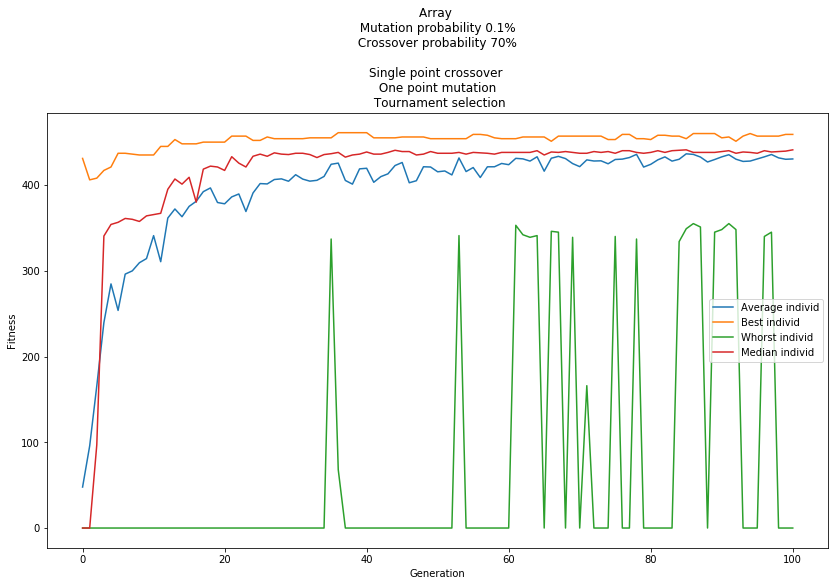

In [5]:
avg=v.select("Average")
md=v.select("Median")
mx=v.select("Min")
mn=v.select("Max")
gen=v.select("gen")

fig, ax = plt.subplots(figsize = (14, 8))
line_avg = ax.plot(gen, avg, label='Average individ')
line_max = ax.plot(gen, mn, label='Best individ')
line_min = ax.plot(gen, mx, label='Whorst individ')
line_md = ax.plot(gen, md, label='Median individ')
ax.legend()
plt.xlabel("Generation")
plt.ylabel("Fitness")
ax.set_title('''Array \n Mutation probability 0.1% \n Crossover probability 70% \n  
Single point crossover \n One point mutation \n Tournament selection''')
plt.show()

# AI VS Pro

In [8]:
top=hof

def evaluate1 (tree):
    n=0
    fitness=0
    function=gp.compile(tree,pset)
    while n<100:
        fight=oneVsPro(function,n)
#         print(fight)
        if fight==2:
            fitness+=1
        n+=1        
    return fitness,


def oneVsPro(tree,n):
    n=0
    player=1
    desc=[[0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0]]

    while n<100:
        if player==1:
            count_1=count1(desc)
            count_2=count2(desc)
            edges_1=edges1(desc)
            edges_2=edges2(desc)
            nearcorner1=near_corner1(desc)
            nearcorner2=near_corner2(desc)
            corner_1=corner1(desc)
            corner_2=corner2(desc)
            center_1=center1(desc)
            center_2=center2(desc)
            tree_pro=gp.compile(top[n],pset)
            step=tree_pro(count1=count_1,count2=count_2,edges1=edges_1,edges2=edges_2,nearCorner1=nearcorner1,nearCorner2=nearcorner2,corner1=corner_1,corner2=corner_2,center1=center_1,center2=center_2)
#             print(step,player)
            if 0<step<8:
                desc=pull(step,player,desc)
                score=checkWins(desc)
                if score==1:
                    return 1
                    break
                if score==2:
                    return 2
                    break   
            player=2
        elif player==2:
            count_1=count1(desc)
            count_2=count2(desc)
            edges_1=edges1(desc)
            edges_2=edges2(desc)
            nearcorner1=near_corner1(desc)
            nearcorner2=near_corner2(desc)
            corner_1=corner1(desc)
            corner_2=corner2(desc)
            center_1=center1(desc)
            center_2=center2(desc)
            step=tree(count1=count_1,count2=count_2,edges1=edges_1,edges2=edges_2,nearCorner1=nearcorner1,nearCorner2=nearcorner2,corner1=corner_1,corner2=corner_2,center1=center_1,center2=center_2)
#             print(step,player)
            desc=pull(step,player,desc)
            if desc==False:
                return 1
                break
            score=checkWins(desc)
            if score==1:
                return 1
                break
            if score==2:
                return 2
                break   
            player=1        
        n+=1
            



In [11]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax,pset=pset)
toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual,toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate1)
toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("select", tools.selRoulette)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=1, max_=3)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
pop = toolbox.population(n=200)
hoff = tools.HallOfFame(100)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Average", numpy.mean)
stats.register("Median", numpy.median)
stats.register("Min", numpy.min)
stats.register("Max", numpy.max)
before = time.time()
q,w=algorithms.eaSimple(pop, toolbox, 0.7, 0.001, 50, stats, halloffame=hoff)
after=time.time()
print('Algorithms time',after-before)

gen	nevals	Average	Median	Min	Max
0  	200   	0      	0     	0  	0  
1  	128   	0.5    	0     	0  	100
2  	140   	1.5    	0     	0  	100
3  	134   	1      	0     	0  	100
4  	140   	1.5    	0     	0  	100
5  	146   	0.5    	0     	0  	100
6  	160   	1      	0     	0  	100
7  	132   	2      	0     	0  	100
8  	122   	0.5    	0     	0  	100
9  	144   	2.5    	0     	0  	100
10 	124   	6.5    	0     	0  	100
11 	144   	11     	0     	0  	100
12 	148   	17     	0     	0  	100
13 	140   	26     	0     	0  	100
14 	152   	35.5   	0     	0  	100
15 	132   	52.5   	100   	0  	100
16 	144   	61     	100   	0  	100
17 	124   	69.5   	100   	0  	100
18 	146   	67.5   	100   	0  	100
19 	162   	63.5   	100   	0  	100
20 	150   	68     	100   	0  	100
21 	130   	73.5   	100   	0  	100
22 	145   	65.5   	100   	0  	100
23 	138   	71     	100   	0  	100
24 	152   	70     	100   	0  	100
25 	136   	77     	100   	0  	100
26 	132   	78.5   	100   	0  	100
27 	150   	76     	100   	0  	100
28 	148   	79.

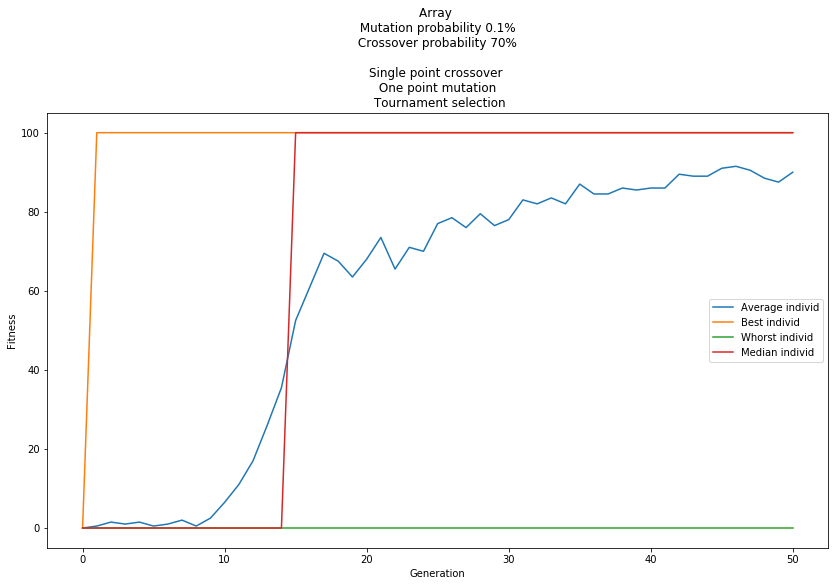

In [12]:
avg=w.select("Average")
md=w.select("Median")
mx=w.select("Min")
mn=w.select("Max")
gen=w.select("gen")

fig, ax = plt.subplots(figsize = (14, 8))
line_avg = ax.plot(gen, avg, label='Average individ')
line_max = ax.plot(gen, mn, label='Best individ')
line_min = ax.plot(gen, mx, label='Whorst individ')
line_md = ax.plot(gen, md, label='Median individ')
ax.legend()
plt.xlabel("Generation")
plt.ylabel("Fitness")
ax.set_title('''Array \n Mutation probability 0.1% \n Crossover probability 70% \n  
Single point crossover \n One point mutation \n Tournament selection''')
plt.show()

In [15]:
print(hoff[10])

sub(if_then_more_else(center2, if_then_more_else(edges1, 7, edges1, 5), edges1, 5), sub(count2, edges1))


# Human vs AI

In [36]:
# atack=hof[0]
# protect=hoff[0]
def Super_proVsHuman():
    n=0
    player=1
    desc=[[0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0],
       [0,0,0,0,0,0,0]]

    while n<100:
        if player==2:
            count_1=count1(desc)
            count_2=count2(desc)
            edges_1=edges1(desc)
            edges_2=edges2(desc)
            nearcorner1=near_corner1(desc)
            nearcorner2=near_corner2(desc)
            corner_1=corner1(desc)
            corner_2=corner2(desc)
            center_1=center1(desc)
            center_2=center2(desc)
            tree_pro=gp.compile(hoff[50],pset)
            step=tree_pro(count1=count_1,count2=count_2,edges1=edges_1,edges2=edges_2,nearCorner1=nearcorner1,nearCorner2=nearcorner2,corner1=corner_1,corner2=corner_2,center1=center_1,center2=center_2)       
            print(step,'Count 1',count_1,'Count 2',count_2,'Edges 1',edges_1,'Edges 2',edges_2,'Near corner 1',nearcorner1,'Near corner 2',nearcorner2,'Corner 1',corner_1,'Corner 2',corner_2,'Center 1',center_1,'Center 2',center_2)
            desc=pull(step,player,desc)
            if desc==False:
                print('Step {} Win Player2'.format(step))
                return 2
        
            score=checkWins(desc)
            printMatrix(desc,n,score,step,player)
            if score==1:
                return 1
                break
            if score==2:
                return 2
                break   
            player=1
        elif player==1:
            count_1=count1(desc)
            count_2=count2(desc)
            edges_1=edges1(desc)
            edges_2=edges2(desc)
            nearcorner1=near_corner1(desc)
            nearcorner2=near_corner2(desc)
            corner_1=corner1(desc)
            corner_2=corner2(desc)
            center_1=center1(desc)
            center_2=center2(desc)
            
#             step=random.randint(1,7)
            step=int(input())
            desc=pull(step,player,desc)
            score=checkWins(desc)
            printMatrix(desc,n,score,step,player)
            if score==1:
                return 1
                break
            if score==2:
                return 2
                break   
            player=2        
        n+=1

In [37]:
Super_proVsHuman()

1
Win: 0
__________Player:1__Step:1__________
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   1   0   0   0   0   0   0
6 Count 1 1 Count 2 0 Edges 1 1 Edges 2 0 Near corner 1 1 Near corner 2 0 Corner 1 1 Corner 2 0 Center 1 0 Center 2 0
Win: 0
__________Player:2__Step:6__________
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   1   0   0   0   0   2   0
5
Win: 0
__________Player:1__Step:5__________
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   1   0   0   0   1   2   0
6 Count 1 2 Count 2 1 Edges 1 2 Edges 2 1 Near corner 1 2 Near corner 2 1 Corner 1 1 Corner 2 0 Center 1 0 Center 2 0
Win: 0
__________Player:2__Step:6__________
   0   0   0   0   0   0   0
   0   0   0   0   0   0   0
   0

2

In [29]:
print(hoff[0])

sub(if_then_more_else(center2, 7, corner2, 5), sub(count2, edges1))
